# <div align="center">**Maternal Mortality Rates in the United States, 2019-2023**
---

## Introduction

#### Health disparities are intricately linked to social determinants of health (SDOH). Factors such as socioeconomic status, race and ethnicity, access to healthcare, and education play a critical role in shaping the overall health outcomes in the United States [1]. It has been reported that Black Americans experience higher mortality rates than other racial and ethnic groups for numerous diseases and conditions including maternal mortality [1]. The U.S. has two to three times the maternal mortality rates of other high-income countries [2], making Black women disproportionally affected in the U.S. with mortality rates two times as high as white women [2].

#### For this project, a dataset from the National Center for Health Statistics was used to visualizes data with four different types of charts. Demonstrated first is the process by which the dataset was cleaned, followed by the visualizations. 

1.	National Center for Health Statistics. Health, United States, 2020–2021: Annual Perspective. Hyattsville, Maryland. 2023. DOI: https://dx.doi.org/10.15620/cdc:122044. 
2.	Gunja MZ, Gumas ED, Masitha R, et al. Insights into the U.S. maternal mortality crisis: An international comparison. Commonwealth Fund. https://doi.org/10.26099/cthn-st75 Published June 4, 2024. Accessed October 31, 2024
 -----

In [46]:
#import the original dataset for total population, age, and race and ethnicity 

import pandas as pd
from pathlib import Path

file_path = Path('mmr.csv')

df = pd.read_csv(file_path)
df.head()


,Data As Of,Jurisdiction,Group,Subgroup,Year of Death,Month of Death,Time Period,Month Ending Date,Maternal Deaths,Live Births,Maternal Mortality Rate,Footnote
0,10/6/24,United States,Total,Total,2019,1,12 month-ending,1/31/19,660.0,3787776,17.4,NaN
1,10/6/24,United States,Total,Total,2019,2,12 month-ending,2/28/19,653.0,3783489,17.3,NaN
2,10/6/24,United States,Total,Total,2019,3,12 month-ending,3/31/19,657.0,3771682,17.4,NaN
3,10/6/24,United States,Total,Total,2019,4,12 month-ending,4/30/19,668.0,3772235,17.7,NaN
4,10/6/24,United States,Total,Total,2019,5,12 month-ending,5/31/19,706.0,3767999,18.7,NaN


Dataset: Provisional Maternal Death Counts and Rates (2019-2024) from the National Center for Health Statistics. https://data.cdc.gov/NCHS/VSRR-Provisional-Maternal-Death-Counts-and-Rates/e2d5-ggg7/about_data

In [48]:
#check the dataset for duplicates

df = df.drop_duplicates()
df.shape


(660, 12)

In [49]:
#delete columns that are not relevant

df = df.drop(columns=['Time Period', 'Month Ending Date', 'Footnote'])

df.head()

,Data As Of,Jurisdiction,Group,Subgroup,Year of Death,Month of Death,Maternal Deaths,Live Births,Maternal Mortality Rate
0,10/6/24,United States,Total,Total,2019,1,660.0,3787776,17.4
1,10/6/24,United States,Total,Total,2019,2,653.0,3783489,17.3
2,10/6/24,United States,Total,Total,2019,3,657.0,3771682,17.4
3,10/6/24,United States,Total,Total,2019,4,668.0,3772235,17.7
4,10/6/24,United States,Total,Total,2019,5,706.0,3767999,18.7


In [50]:
#remove data from 2024 (only January to June is available for 2024)

remove_year = df[(df['Year of Death'] == 2024)].index
df.drop(remove_year, inplace=True)
df.head()


,Data As Of,Jurisdiction,Group,Subgroup,Year of Death,Month of Death,Maternal Deaths,Live Births,Maternal Mortality Rate
0,10/6/24,United States,Total,Total,2019,1,660.0,3787776,17.4
1,10/6/24,United States,Total,Total,2019,2,653.0,3783489,17.3
2,10/6/24,United States,Total,Total,2019,3,657.0,3771682,17.4
3,10/6/24,United States,Total,Total,2019,4,668.0,3772235,17.7
4,10/6/24,United States,Total,Total,2019,5,706.0,3767999,18.7


In [51]:
#separate data by 'Group' for Total Population

df_total = df[df['Group'] == 'Total']
df_total.head()


,Data As Of,Jurisdiction,Group,Subgroup,Year of Death,Month of Death,Maternal Deaths,Live Births,Maternal Mortality Rate
0,10/6/24,United States,Total,Total,2019,1,660.0,3787776,17.4
1,10/6/24,United States,Total,Total,2019,2,653.0,3783489,17.3
2,10/6/24,United States,Total,Total,2019,3,657.0,3771682,17.4
3,10/6/24,United States,Total,Total,2019,4,668.0,3772235,17.7
4,10/6/24,United States,Total,Total,2019,5,706.0,3767999,18.7


In [52]:
#check the number of rows

df_total.shape


(60, 9)

In [53]:
#remove missing data and check shape

df_total = df_total.dropna()
df_total.shape


(60, 9)

In [54]:
#save the clean data as new file

df_total.to_csv("df_total_cln.csv")


In [55]:
#call the new clean data for Total Population

import pandas as pd
from pathlib import Path

file_path = Path('df_total_cln.csv')

df_total_cln = pd.read_csv(file_path)

df_total_cln.head()


,Unnamed: 0,Data As Of,Jurisdiction,Group,Subgroup,Year of Death,Month of Death,Maternal Deaths,Live Births,Maternal Mortality Rate
0,0,10/6/24,United States,Total,Total,2019,1,660.0,3787776,17.4
1,1,10/6/24,United States,Total,Total,2019,2,653.0,3783489,17.3
2,2,10/6/24,United States,Total,Total,2019,3,657.0,3771682,17.4
3,3,10/6/24,United States,Total,Total,2019,4,668.0,3772235,17.7
4,4,10/6/24,United States,Total,Total,2019,5,706.0,3767999,18.7


In [56]:
#separate data by 'Group' for Age

df_age = df[df['Group'] == 'Age']
df_age.head()


,Data As Of,Jurisdiction,Group,Subgroup,Year of Death,Month of Death,Maternal Deaths,Live Births,Maternal Mortality Rate
12,10/6/24,United States,Age,Under 25 years,2019,1,98.0,904573,10.8
13,10/6/24,United States,Age,Under 25 years,2019,2,103.0,901429,11.4
14,10/6/24,United States,Age,Under 25 years,2019,3,101.0,896332,11.3
15,10/6/24,United States,Age,Under 25 years,2019,4,107.0,894830,12.0
16,10/6/24,United States,Age,Under 25 years,2019,5,113.0,892029,12.7


In [57]:
#check number of rows

df_age.shape


(180, 9)

In [58]:
#remove missing data and check shape

df_age = df_age.dropna()

df_age.shape


(180, 9)

In [59]:
#save clean data as new file

df_age.to_csv("df_age_cln.csv")


In [60]:
#call the new clean data for Age Group

import pandas as pd
from pathlib import Path

file_path = Path('df_age_cln.csv')

df_age_cln = pd.read_csv(file_path)
df_age_cln.head()


,Unnamed: 0,Data As Of,Jurisdiction,Group,Subgroup,Year of Death,Month of Death,Maternal Deaths,Live Births,Maternal Mortality Rate
0,12,10/6/24,United States,Age,Under 25 years,2019,1,98.0,904573,10.8
1,13,10/6/24,United States,Age,Under 25 years,2019,2,103.0,901429,11.4
2,14,10/6/24,United States,Age,Under 25 years,2019,3,101.0,896332,11.3
3,15,10/6/24,United States,Age,Under 25 years,2019,4,107.0,894830,12.0
4,16,10/6/24,United States,Age,Under 25 years,2019,5,113.0,892029,12.7


In [61]:
#separate data by 'Group' for Race and Hispanic origin

df_race = df[df['Group'] == 'Race and Hispanic origin']
df_race.head()


,Data As Of,Jurisdiction,Group,Subgroup,Year of Death,Month of Death,Maternal Deaths,Live Births,Maternal Mortality Rate
48,10/6/24,United States,Race and Hispanic origin,Hispanic,2019,1,90.0,885705,10.2
49,10/6/24,United States,Race and Hispanic origin,Hispanic,2019,2,90.0,885333,10.2
50,10/6/24,United States,Race and Hispanic origin,Hispanic,2019,3,89.0,883687,10.1
51,10/6/24,United States,Race and Hispanic origin,Hispanic,2019,4,96.0,884928,10.8
52,10/6/24,United States,Race and Hispanic origin,Hispanic,2019,5,103.0,884930,11.6


In [62]:
#check the number of rows

df_race.shape


(360, 9)

In [63]:
#remove missing data and check shape

df_race = df_race.dropna()
df_race.shape


(254, 9)

In [64]:
#save clean data as new file

df_race.to_csv("df_race_cln.csv")


In [65]:
# call the new clean data for Race and Hispanic Origin 

import pandas as pd
from pathlib import Path

file_path = Path('df_race_cln.csv')

df_race_cln = pd.read_csv(file_path)
df_race_cln.head()


,Unnamed: 0,Data As Of,Jurisdiction,Group,Subgroup,Year of Death,Month of Death,Maternal Deaths,Live Births,Maternal Mortality Rate
0,48,10/6/24,United States,Race and Hispanic origin,Hispanic,2019,1,90.0,885705,10.2
1,49,10/6/24,United States,Race and Hispanic origin,Hispanic,2019,2,90.0,885333,10.2
2,50,10/6/24,United States,Race and Hispanic origin,Hispanic,2019,3,89.0,883687,10.1
3,51,10/6/24,United States,Race and Hispanic origin,Hispanic,2019,4,96.0,884928,10.8
4,52,10/6/24,United States,Race and Hispanic origin,Hispanic,2019,5,103.0,884930,11.6


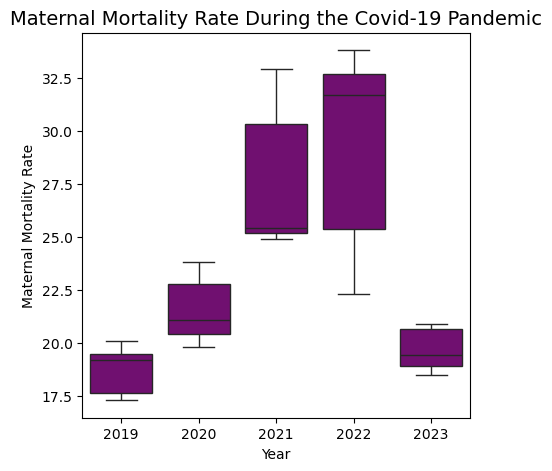

In [66]:
# create a boxplot to trend Maternal Mortality Rate by Year

import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(5,5))                       

sns.boxplot(x = df_total_cln['Year of Death'], y = df_total_cln['Maternal Mortality Rate'], color = 'purple') 

plt.title('Maternal Mortality Rate During the Covid-19 Pandemic', fontsize = 14)
plt.xlabel('Year')
plt.ylabel('Maternal Mortality Rate')
plt.show() 


#### This boxplot trends the increase in maternal deaths during the pandemic. 

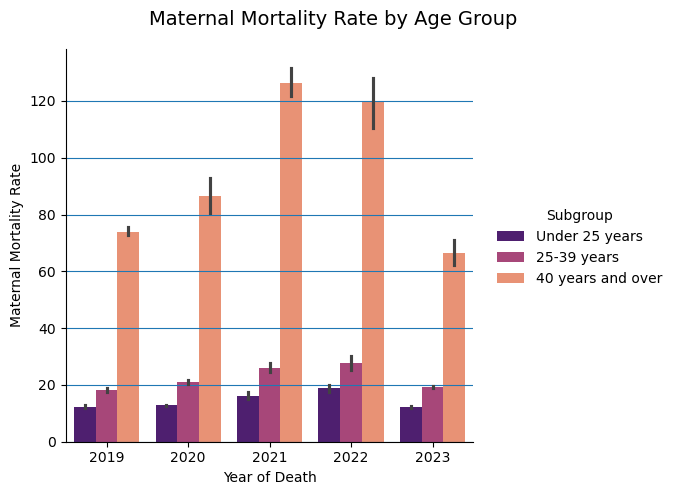

In [68]:
#create a grouped bar chart to compare maternal mortality rate by age

import seaborn as sns

g = sns.catplot(data = df_age_cln, x = 'Year of Death', y = "Maternal Mortality Rate", hue = "Subgroup", kind = "bar", palette = 'magma')
g.fig.suptitle('Maternal Mortality Rate by Age Group', fontsize = 14)
g.map(plt.grid, axis = 'y')
plt.show()


#### This grouped bar chart highlights the increased risk of maternal death as age increased. Maternal mortality rates are lowest for women under age 25, slightly higher in women aged 25-39, and significantly greater in women aged 40 and over.   

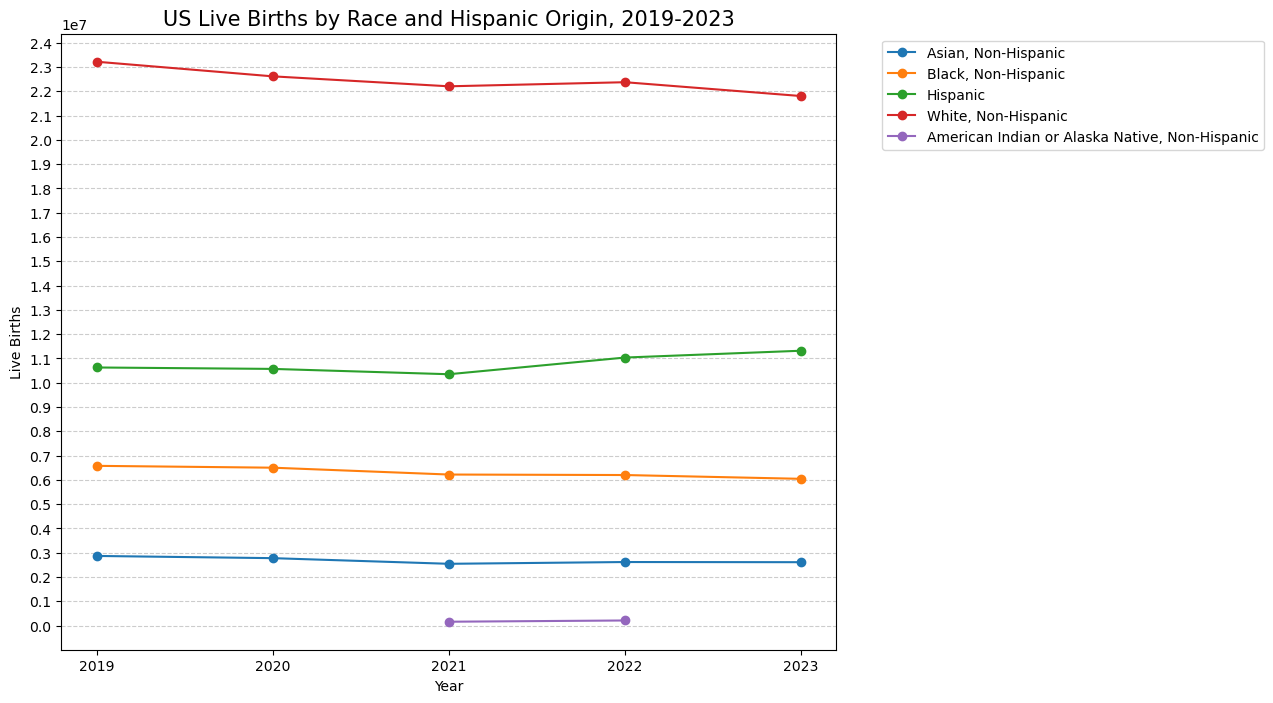

In [70]:
#create a line chart to compare the number of live births by Race and Hispanic Origin across all years

import matplotlib
from matplotlib import pyplot as plt

plt.figure(figsize = (10,8))
plt.xlabel('Year')
plt.ylabel('Live Births')
plt.title('US Live Births by Race and Hispanic Origin, 2019-2023', fontsize = 15)
plt.grid(axis = 'y', linestyle = '--', color = 'gray', alpha = 0.4)
plt.yticks(np.arange(0, 30000000, 1000000))

race_group = df_race_cln.groupby(['Year of Death', 'Subgroup'])['Live Births'].sum().reset_index()

race_group['Year of Death'] = race_group['Year of Death'].astype(str)

for subgroup in race_group['Subgroup'].unique():
    subset = race_group.loc[race_group['Subgroup'] == subgroup]
    plt.plot(subset['Year of Death'], subset['Live Births'], label = subgroup, marker = 'o')

plt.legend(loc="upper left", fontsize= 'small')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


---
#### Live births across all races remain mostly stable throughout the COVID-19 pandemic with a small decrease in the white population and a slight increase in the Hispanic population. Note that per the original dataset "Data counts between 1-9 have been suppressed in accordance with NCHS confidentiality standards" and "Rates for deaths counts <20 are unreliable" which is why there is only 2021-2022 data for the American Indian or Alaska Native group and no data for the Native Hawiian or Other Pacific Islander group.
---

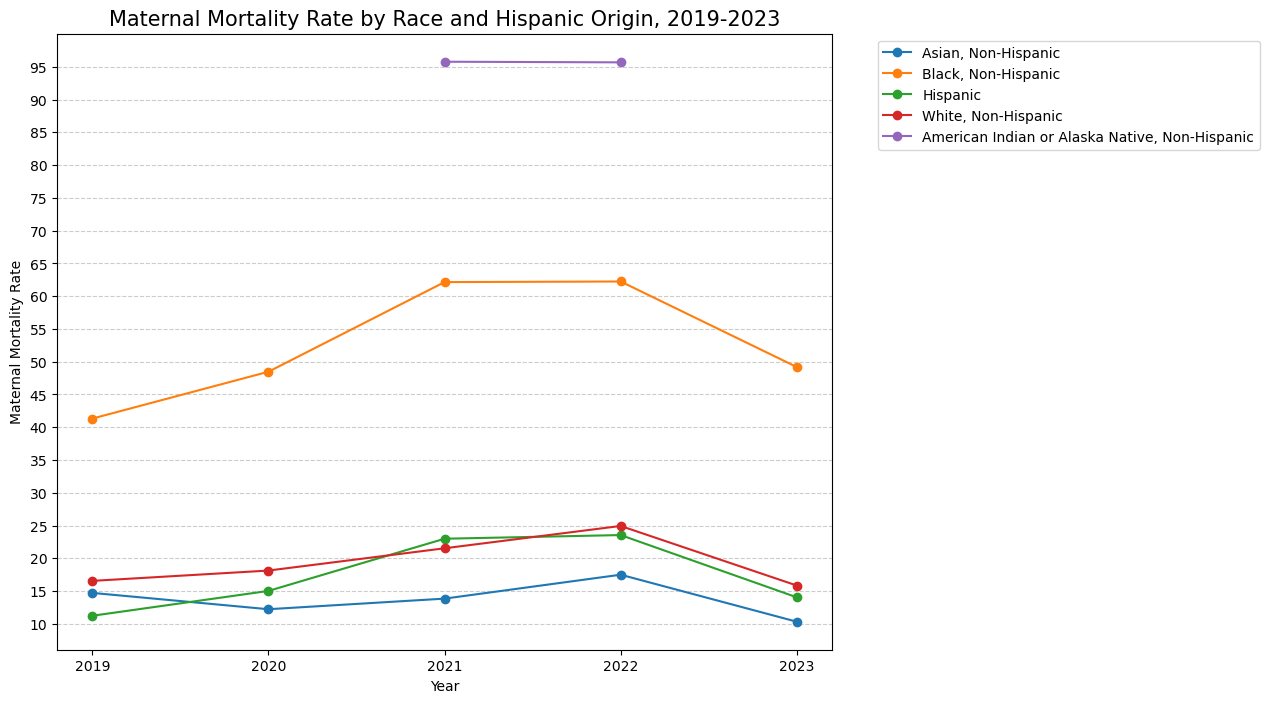

In [72]:
#create a line chart to compare the maternal mortality rate by Race and Hispanic Origin across all years

import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline 

plt.figure(figsize = (10,8))
plt.xlabel('Year')
plt.ylabel('Maternal Mortality Rate')
plt.title('Maternal Mortality Rate by Race and Hispanic Origin, 2019-2023', fontsize = 15)
plt.grid(axis = 'y', linestyle = '--', color = 'gray', alpha = 0.4)
plt.yticks(np.arange(0, 100, 5))

race_group = df_race_cln.groupby(['Year of Death', 'Subgroup'])['Maternal Mortality Rate'].mean().reset_index()

race_group['Year of Death'] = race_group['Year of Death'].astype(str)

for subgroup in race_group['Subgroup'].unique():
    subset = race_group.loc[race_group['Subgroup'] == subgroup]
    plt.plot(subset['Year of Death'], subset['Maternal Mortality Rate'], label = subgroup, marker = 'o')

plt.legend(loc="upper left", fontsize= 'small')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


---
#### The maternal mortality rate is more than double for Black mothers compared to Asian, Hispanic, and white mothers as expected. An unexpected result is this project is the mortality rate for American Indian or Alaka Native mothers which is nearly four times as high as that of Hispanic and white mothers and five to six times as high as for Aisan mothers. 
---

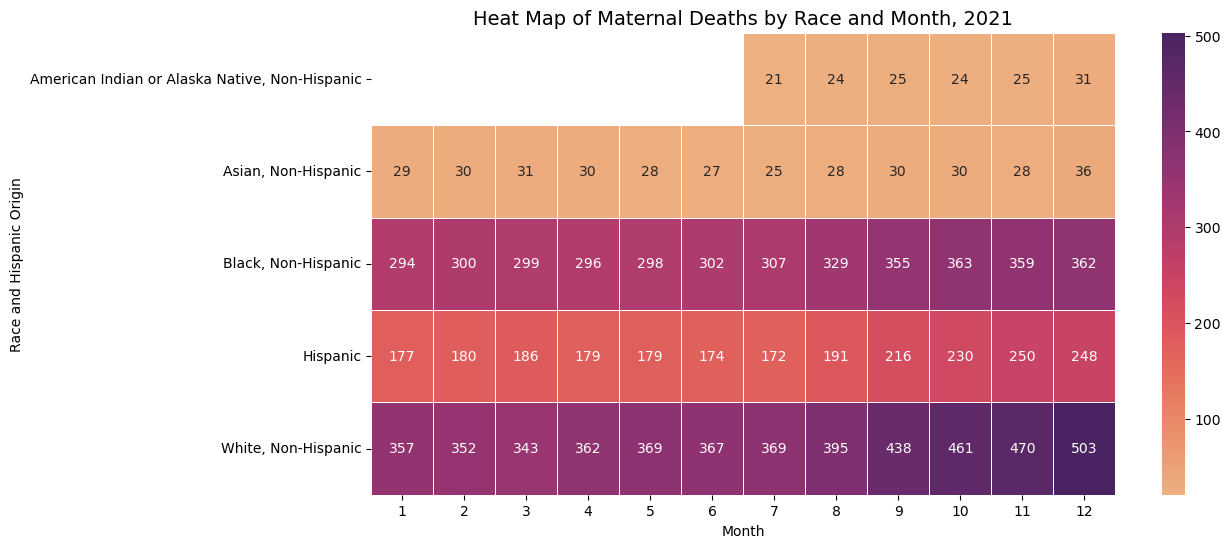

In [74]:
#create a heatmap of Maternal Deaths by Race and Month in 2021 to look for effects of COVID-19 surges

import seaborn as sns 
import matplotlib.pyplot as plt

race_month_data_2021 = df_race_cln[df_race_cln['Year of Death'] == 2021]
heatmap_data = race_month_data_2021.pivot_table(values = 'Maternal Deaths', 
                                                index = 'Subgroup', 
                                                columns = 'Month of Death', 
                                                aggfunc = 'sum'
                                               )

plt.figure(figsize = (12, 6))
sns.heatmap(heatmap_data, annot = True, fmt = 'g', cmap = 'flare', linewidth = 0.5)
plt.title('Heat Map of Maternal Deaths by Race and Month, 2021', fontsize = 14)
plt.xlabel('Month')
plt.ylabel('Race and Hispanic Origin')
plt.show()


#### The number of deaths for Black, Hispanic, and White mothers increased in the second half of 2021. This heat map demonstrates the effect of two Covid surges in the second half of 2021, the Delta variant in July and the Omicron variant in November [3].

3. Katella K. Omicron, Delta, Alpha, and More: What To Know About the Coronavirus Variants. September 1, 2023. Accessed December 9, 2024. https://www.yalemedicine.org/news/covid-19-variants-of-concern-omicron

---
#### In conclusion this data reveals the that from 2019-2023 US Live births were stable for all race and ethnicity groups, American Indian and Alaskan Native and Black mothers suffered from signfincantly greater mortality rates compared to Asian, Hispanic, and white mothers, mortality rates for all race and ethnicity groups increased during COVID-19 surges, southern states had higher maternal mortality rates from 2018-2022, and women over 40 had higher mortality rates compared to younger women for all years (2019-2023).
---